In [1]:
import pandas as pd
import childespy as chp 
import os 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
hfont = {'fontname':'Nimbus Sans'}


Reinstalling childesr version 0.2.1
--- Please select a CRAN mirror for use in this session ---
Secure CRAN mirrors 

 1: 0-Cloud [https]
 2: Australia (Canberra) [https]
 3: Australia (Melbourne 1) [https]
 4: Australia (Melbourne 2) [https]
 5: Austria [https]
 6: Belgium (Brussels) [https]
 7: Brazil (PR) [https]
 8: Brazil (SP 1) [https]
 9: Brazil (SP 2) [https]
10: Bulgaria [https]
11: Canada (MB) [https]
12: Canada (ON 1) [https]
13: Canada (ON 2) [https]
14: Chile (Santiago) [https]
15: China (Beijing 2) [https]
16: China (Beijing 3) [https]
17: China (Hefei) [https]
18: China (Hong Kong) [https]
19: China (Guangzhou) [https]
20: China (Jinan) [https]
21: China (Nanjing) [https]
22: China (Shanghai 2) [https]
23: China (Shenzhen) [https]
24: China (Wuhan) [https]
25: Colombia (Cali) [https]
26: Costa Rica [https]
27: Cyprus [https]
28: Czech Republic [https]
29: Denmark [https]
30: East Asia [https]
31: Ecuador (Cuenca) [https]
32: France (Lyon 1) [https]
33: France (Lyon 2) [h

R[write to console]: trying URL 'https://mirror.las.iastate.edu/CRAN/src/contrib/childesr_0.2.3.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 22865 bytes (22 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

The below block is only for getting first 5 mins of a gold transcript

In [21]:
def get_first5min_gold(xmlfilepath):
    name_of_child = os.path.basename(os.path.split(xmlfilepath)[0])
    name_of_file = os.path.basename(xmlfilepath)[:-4]
    all_utt = chp.get_utterances(corpus="Providence", target_child = name_of_child)
    l = pd.merge(all_utt,file_transcript_bridge[['transcript_id','filename']],how='left', on = 'transcript_id')
    alex_relevant_1 = l[l['filename'] == xmlfilepath]
    alex_relevant_2 = l[(l['filename']==xmlfilepath) & (l['media_end'] <=301)]
    maxutt = max(alex_relevant_2['utterance_order'])
    df_gold_alex = alex_relevant_1[alex_relevant_1['utterance_order']<=maxutt]
    csvsave = f"{name_of_child}_{name_of_file}_first5.csv"
    csvpath = os.path.join('/om/user/arjunp/goldTranscripts',csvsave)
    df_gold_alex.to_csv(csvpath,index=False)
    print("First 5 mins of CHILDES data scraped from", name_of_child+'_'+name_of_file)

In [22]:
filenames_of_interest = ['Eng-NA/Providence/Naima/020720.xml'
,'Eng-NA/Providence/Violet/030119.xml'
,'Eng-NA/Providence/Lily/030725.xml'
,'Eng-NA/Providence/Lily/040002.xml'
,'Eng-NA/Providence/Ethan/020208.xml'
,'Eng-NA/Providence/William/011115.xml'
,'Eng-NA/Providence/Naima/010801.xml'
,'Eng-NA/Providence/Alex/010526.xml'
,'Eng-NA/Providence/William/030011.xml'
,'Eng-NA/Providence/Ethan/021005.xml']

In [23]:
for xml in filenames_of_interest:
    get_first5min_gold(xml)

R[write to console]: Using current database version: '2021.1'.



R[write to console]: Getting data from 1 child in 1 corpus ...

R[write to console]: Using current database version: '2021.1'.



First 5 mins of CHILDES data scraped from Naima_020720


R[write to console]: Getting data from 1 child in 1 corpus ...

R[write to console]: Using current database version: '2021.1'.



First 5 mins of CHILDES data scraped from Violet_030119


R[write to console]: Getting data from 1 child in 1 corpus ...

R[write to console]: Using current database version: '2021.1'.



First 5 mins of CHILDES data scraped from Lily_030725


R[write to console]: Getting data from 1 child in 1 corpus ...

R[write to console]: Using current database version: '2021.1'.



First 5 mins of CHILDES data scraped from Lily_040002


R[write to console]: Getting data from 1 child in 1 corpus ...

R[write to console]: Using current database version: '2021.1'.



First 5 mins of CHILDES data scraped from Ethan_020208


R[write to console]: Getting data from 1 child in 1 corpus ...

R[write to console]: Using current database version: '2021.1'.



First 5 mins of CHILDES data scraped from William_011115


R[write to console]: Getting data from 1 child in 1 corpus ...

R[write to console]: Using current database version: '2021.1'.



First 5 mins of CHILDES data scraped from Naima_010801


R[write to console]: Getting data from 1 child in 1 corpus ...

R[write to console]: Using current database version: '2021.1'.



First 5 mins of CHILDES data scraped from Alex_010526


R[write to console]: Getting data from 1 child in 1 corpus ...

R[write to console]: Using current database version: '2021.1'.



First 5 mins of CHILDES data scraped from William_030011


R[write to console]: Getting data from 1 child in 1 corpus ...



First 5 mins of CHILDES data scraped from Ethan_021005


In [3]:
#transcript_df = chp.get_sql_query("SELECT * FROM transcript WHERE corpus_name = 'Providence'")
#utt_df = chp.get_sql_query("SELECT * FROM utterance WHERE corpus_name = 'Providence'")


In [4]:
allutt = chp.get_utterances(corpus='Providence')
allutt['target_child_name'].value_counts()

R[write to console]: Using current database version: '2021.1'.

R[write to console]: Getting data from 7 children in 1 corpus ...



target_child_name
Lily       112849
Naima      109368
Alex        72626
Ethan       60111
William     56372
Violet      48735
Name: count, dtype: int64

In [5]:
allutt.to_csv('Providence.csv',index=False)

In [5]:
#chp.get_transcripts(collection ='Other')['corpus_name'].unique()

compare integers for lookups

In [2]:
t_df = chp.get_transcripts(corpus = 'Providence')
child_names = t_df['target_child_name'].unique()

R[write to console]: Using current database version: '2021.1'.



Transcripts with no child name

In [3]:
t_df[t_df['target_child_name']=='None']

,transcript_id,corpus_name,language,date,filename,target_child_name,target_child_age,target_child_sex,collection_name,pid,collection_id,corpus_id,target_child_id
2,43209,Providence,nan,None,Eng-NA/Providence/Alex/010700.xml,None,NaN,None,Eng-NA,11312/a-00016830-1,21,336,23470
314,43521,Providence,nan,None,Eng-NA/Providence/Violet/030200.xml,None,NaN,None,Eng-NA,11312/a-00016829-1,21,336,23470


Transcripts with `None` in their target_child_name can be ignored as those are dummy transcripts (hand-verified)

In [4]:
child_names = [c for c in child_names if c!='None']

In [5]:
child_names

['Alex', 'Ethan', 'Lily', 'Naima', 'Violet', 'William']

In [5]:
utt_dfs = []
for child in child_names:
    utt_dfs.append(chp.get_utterances(corpus = 'Providence', target_child  = child))

R[write to console]: Using current database version: '2021.1'.



R[write to console]: Getting data from 1 child in 1 corpus ...

R[write to console]: Using current database version: '2021.1'.

R[write to console]: Getting data from 1 child in 1 corpus ...

R[write to console]: Using current database version: '2021.1'.

R[write to console]: Getting data from 1 child in 1 corpus ...

R[write to console]: Using current database version: '2021.1'.

R[write to console]: Getting data from 1 child in 1 corpus ...

R[write to console]: Using current database version: '2021.1'.

R[write to console]: Getting data from 1 child in 1 corpus ...

R[write to console]: Using current database version: '2021.1'.

R[write to console]: Getting data from 1 child in 1 corpus ...



In [50]:
t_df

,transcript_id,corpus_name,language,date,filename,target_child_name,target_child_age,target_child_sex,collection_name,pid,collection_id,corpus_id,target_child_id
1,43208,Providence,eng,2002-05-02,Eng-NA/Providence/Alex/010427.xml,Alex,16.887410,male,Eng-NA,11312/c-00040975-1,21,336,23471
2,43209,Providence,nan,None,Eng-NA/Providence/Alex/010700.xml,None,NaN,None,Eng-NA,11312/a-00016830-1,21,336,23470
3,43210,Providence,eng,2002-05-16,Eng-NA/Providence/Alex/010512.xml,Alex,17.394608,male,Eng-NA,11312/c-00040976-1,21,336,23471
4,43211,Providence,eng,2002-05-30,Eng-NA/Providence/Alex/010526.xml,Alex,17.854576,male,Eng-NA,11312/c-00040977-1,21,336,23471
5,43212,Providence,eng,2002-06-18,Eng-NA/Providence/Alex/010614.xml,Alex,18.460338,male,Eng-NA,11312/c-00040978-1,21,336,23471
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,43569,Providence,eng,2004-04-01,Eng-NA/Providence/William/030125.xml,William,37.822132,male,Eng-NA,11312/c-00041334-1,21,336,23530
363,43570,Providence,eng,2004-04-29,Eng-NA/Providence/William/030221.xml,William,38.690733,male,Eng-NA,11312/c-00041335-1,21,336,23530
364,43571,Providence,eng,2004-05-13,Eng-NA/Providence/William/030305.xml,William,39.165075,male,Eng-NA,11312/c-00041336-1,21,336,23530
365,43572,Providence,eng,2004-06-01,Eng-NA/Providence/William/030325.xml,William,39.822173,male,Eng-NA,11312/c-00041337-1,21,336,23530


In [13]:
#u_df

In [6]:
subset_info = t_df[['transcript_id','filename']]

In [7]:
subset_info

,transcript_id,filename
1,43208,Eng-NA/Providence/Alex/010427.xml
2,43209,Eng-NA/Providence/Alex/010700.xml
3,43210,Eng-NA/Providence/Alex/010512.xml
4,43211,Eng-NA/Providence/Alex/010526.xml
5,43212,Eng-NA/Providence/Alex/010614.xml
...,...,...
362,43569,Eng-NA/Providence/William/030125.xml
363,43570,Eng-NA/Providence/William/030221.xml
364,43571,Eng-NA/Providence/William/030305.xml
365,43572,Eng-NA/Providence/William/030325.xml


In [51]:
full_merge_with_split['transcript_id'].nunique()

364

Now merging actual transcript filenames with the ID

In [8]:
child_with_transcripts = []
for childdf in utt_dfs:
    merged_df = pd.merge(childdf, subset_info, on='transcript_id', how='left')
    child_with_transcripts.append(merged_df )

In [10]:
child_with_transcripts[0]

,id,gloss,stem,actual_phonology,model_phonology,type,language,num_morphemes,num_tokens,utterance_order,...,media_start,media_end,media_unit,collection_name,collection_id,corpus_id,speaker_id,target_child_id,transcript_id,filename
0,17264832,where do you want me to go,where do you want me to go,,,question,eng,7,7,1,...,0.000,7.830,s,Eng-NA,21,336,23475,23471,43208,Eng-NA/Providence/Alex/010427.xml
1,17264840,anywhere you'll feel comfortable um anywhere,anywhere you feel comfort anywhere,,,declarative,eng,8,6,2,...,NaN,NaN,None,Eng-NA,21,336,23473,23471,43208,Eng-NA/Providence/Alex/010427.xml
2,17264848,please don't do that,please do do that,,,declarative,eng,5,4,3,...,7.830,10.888,s,Eng-NA,21,336,23473,23471,43208,Eng-NA/Providence/Alex/010427.xml
3,17264856,this is,this be,,,self interruption,eng,3,2,4,...,10.888,15.525,s,Eng-NA,21,336,23473,23471,43208,Eng-NA/Providence/Alex/010427.xml
4,17264864,go into the kitchen and check in about,go into the kitchen and check in about,,,self interruption,eng,8,8,5,...,NaN,NaN,None,Eng-NA,21,336,23475,23471,43208,Eng-NA/Providence/Alex/010427.xml
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72621,17398709,xxx,,,,declarative,eng,-2147483648,1,2174,...,NaN,NaN,None,Eng-NA,21,336,23475,23471,43259,Eng-NA/Providence/Alex/030516.xml
72622,17398722,xxx,,,,declarative,eng,-2147483648,1,2175,...,3941.016,3945.158,s,Eng-NA,21,336,23471,23471,43259,Eng-NA/Providence/Alex/030516.xml
72623,17398739,Alex can Mommy have your microphone please for...,Alex can Mommy have your microphone please for...,,,question,eng,9,9,2176,...,NaN,NaN,None,Eng-NA,21,336,23473,23471,43259,Eng-NA/Providence/Alex/030516.xml
72624,17398756,go give it to Mommy,go give it to Mommy,,,declarative,eng,5,5,2177,...,NaN,NaN,None,Eng-NA,21,336,23479,23471,43259,Eng-NA/Providence/Alex/030516.xml


## Now concatenating all child dfs

In [9]:
full_merge = pd.concat([d for d in child_with_transcripts]).reset_index()

In [12]:
print('youngest child in providence: ', full_merge['target_child_age'].min())
print('oldest child in providence: ', full_merge['target_child_age'].max())

youngest child in providence:  11.131645413663525
oldest child in providence:  48.06669541469024


In [10]:
import math 
start = math.floor(full_merge['target_child_age'].min()/6)
end = math.ceil(full_merge['target_child_age'].max()/6)

Is identity of child important in the split? currently, no

In [11]:
bin_edges = [6*i for i in range(start,end+1)]
bin_edges

[6, 12, 18, 24, 30, 36, 42, 48, 54]

In [12]:
labels = [str(bin_edges[i])+"-"+str(bin_edges[i+1]) for i in range(len(bin_edges)-1)]  # Define bin labels

In [15]:
labels

['6-12', '12-18', '18-24', '24-30', '30-36', '36-42', '42-48', '48-54']

In [13]:
cuts = pd.cut(full_merge['target_child_age'], bins=bin_edges, labels=labels, include_lowest=True)

In [14]:
full_merge['bin_label'] = cuts

In [18]:
full_merge

,index,id,gloss,stem,actual_phonology,model_phonology,type,language,num_morphemes,num_tokens,...,media_end,media_unit,collection_name,collection_id,corpus_id,speaker_id,target_child_id,transcript_id,filename,bin_label
0,0,17264832,where do you want me to go,where do you want me to go,,,question,eng,7,7,...,7.830,s,Eng-NA,21,336,23475,23471,43208,Eng-NA/Providence/Alex/010427.xml,12-18
1,1,17264840,anywhere you'll feel comfortable um anywhere,anywhere you feel comfort anywhere,,,declarative,eng,8,6,...,NaN,None,Eng-NA,21,336,23473,23471,43208,Eng-NA/Providence/Alex/010427.xml,12-18
2,2,17264848,please don't do that,please do do that,,,declarative,eng,5,4,...,10.888,s,Eng-NA,21,336,23473,23471,43208,Eng-NA/Providence/Alex/010427.xml,12-18
3,3,17264856,this is,this be,,,self interruption,eng,3,2,...,15.525,s,Eng-NA,21,336,23473,23471,43208,Eng-NA/Providence/Alex/010427.xml,12-18
4,4,17264864,go into the kitchen and check in about,go into the kitchen and check in about,,,self interruption,eng,8,8,...,NaN,None,Eng-NA,21,336,23475,23471,43208,Eng-NA/Providence/Alex/010427.xml,12-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460056,56367,17753088,xxx,,*,*,declarative,eng,-2147483648,1,...,1571.061,s,Eng-NA,21,336,23530,23530,43562,Eng-NA/Providence/William/020822.xml,30-36
460057,56368,17753090,xxx my lion Daddy I don't bring my lion,my lion Daddy I do bring my lion,* mə laɪɛn dædi aɪ don brɪŋ maɪ laɪɛn,* maɪ laɪən dædiː aɪ doʊnt bɹɪŋ maɪ laɪən,declarative,eng,9,9,...,1576.861,s,Eng-NA,21,336,23530,23530,43562,Eng-NA/Providence/William/020822.xml,30-36
460058,56369,17753091,come here Will,come here Will,,,declarative,eng,3,3,...,1577.373,s,Eng-NA,21,336,23534,23530,43562,Eng-NA/Providence/William/020822.xml,30-36
460059,56370,17753092,yyy yyy yyy yyy,,dɜ˞r dɛ dɜ˞r dɜ˞r,* * * *,declarative,eng,-2147483648,4,...,1581.430,s,Eng-NA,21,336,23530,23530,43562,Eng-NA/Providence/William/020822.xml,30-36


In [13]:
len(full_merge['transcript_id'].unique())

364

In [15]:
full_merge[full_merge['transcript_id'] == 43562]['target_child_age']

459279    32.723465
459280    32.723465
459281    32.723465
459282    32.723465
459283    32.723465
            ...    
460056    32.723465
460057    32.723465
460058    32.723465
460059    32.723465
460060    32.723465
Name: target_child_age, Length: 782, dtype: float64

In [16]:
trans_ages = full_merge[['transcript_id','target_child_age','target_child_name']].drop_duplicates()

In [17]:
cuts_copy = pd.cut(trans_ages['target_child_age'], bins=bin_edges, labels=labels, include_lowest=True)
trans_ages['bin_label'] = cuts_copy

In [30]:
trans_ages

,transcript_id,target_child_age,target_child_name,bin_label
0,43208,16.887410,Alex,12-18
31,43210,17.394608,Alex,12-18
46,43211,17.854576,Alex,12-18
70,43212,18.460338,Alex,18-24
165,43213,19.230374,Alex,18-24
...,...,...,...,...
446930,43553,28.526253,William,24-30
447995,43572,39.822173,William,36-42
448854,43569,37.822132,William,36-42
454765,43550,27.230539,William,24-30


## Splitting transcripts from each bucket into TR/TE (each bucket is a unique combination of name and age group)

In [18]:
age_child_prod = len(labels)*len(child_names)

In [19]:
transcripts_with_splits = []
seeds = [i for i in range(0, age_child_prod)]

i = 0
for binlabel in labels:
    for child in child_names:
        np.random.seed(seeds[i])
        #binlabel = labels[i]
        bin_df = trans_ages[(trans_ages['bin_label'] == binlabel) & (trans_ages['target_child_name'] == child)]
        nrows = len(bin_df)
        ntr = math.floor(nrows*0.8)
        nva = math.floor(nrows*0.1)
        nte = nrows - ntr - nva
        lab = ["TR"] * ntr + ["VA"] * nva + ["TE"] * nte
        lab_array = np.array(lab)
        np.random.shuffle(lab_array)
        bin_df['split'] = lab_array
        transcripts_with_splits.append(bin_df)
        i = i+1

/tmp/ipykernel_1032755/3899444937.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_df['split'] = lab_array
/tmp/ipykernel_1032755/3899444937.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_df['split'] = lab_array
/tmp/ipykernel_1032755/3899444937.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [23]:
transcripts_with_splits[1]

,transcript_id,target_child_age,target_child_name,bin_label,split
72626,43260,11.131645,Ethan,6-12,TR
72714,43261,11.690178,Ethan,6-12,TE


In [20]:
trans_labelled = pd.concat([d for d in transcripts_with_splits]).reset_index()
trans_labelled

,index,transcript_id,target_child_age,target_child_name,bin_label,split
0,72626,43260,11.131645,Ethan,6-12,TR
1,72714,43261,11.690178,Ethan,6-12,TE
2,246205,43390,11.854453,Naima,6-12,TE
3,0,43208,16.887410,Alex,12-18,TR
4,31,43210,17.394608,Alex,12-18,TR
...,...,...,...,...,...,...
359,390807,43527,44.756566,Violet,42-48,TR
360,394130,43529,47.789482,Violet,42-48,TE
361,399427,43526,43.723690,Violet,42-48,TR
362,400796,43528,46.592332,Violet,42-48,TR


Re-labelling the above table so that all VA tags become TE. Get rid of the below cell if we want 3-way split instead.

In [21]:
trans_labelled.loc[trans_labelled['split'] =='VA', 'split'] = 'TE'

In [26]:
full_merge

,index,id,gloss,stem,actual_phonology,model_phonology,type,language,num_morphemes,num_tokens,...,media_end,media_unit,collection_name,collection_id,corpus_id,speaker_id,target_child_id,transcript_id,filename,bin_label
0,0,17264832,where do you want me to go,where do you want me to go,,,question,eng,7,7,...,7.830,s,Eng-NA,21,336,23475,23471,43208,Eng-NA/Providence/Alex/010427.xml,12-18
1,1,17264840,anywhere you'll feel comfortable um anywhere,anywhere you feel comfort anywhere,,,declarative,eng,8,6,...,NaN,None,Eng-NA,21,336,23473,23471,43208,Eng-NA/Providence/Alex/010427.xml,12-18
2,2,17264848,please don't do that,please do do that,,,declarative,eng,5,4,...,10.888,s,Eng-NA,21,336,23473,23471,43208,Eng-NA/Providence/Alex/010427.xml,12-18
3,3,17264856,this is,this be,,,self interruption,eng,3,2,...,15.525,s,Eng-NA,21,336,23473,23471,43208,Eng-NA/Providence/Alex/010427.xml,12-18
4,4,17264864,go into the kitchen and check in about,go into the kitchen and check in about,,,self interruption,eng,8,8,...,NaN,None,Eng-NA,21,336,23475,23471,43208,Eng-NA/Providence/Alex/010427.xml,12-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460056,56367,17753088,xxx,,*,*,declarative,eng,-2147483648,1,...,1571.061,s,Eng-NA,21,336,23530,23530,43562,Eng-NA/Providence/William/020822.xml,30-36
460057,56368,17753090,xxx my lion Daddy I don't bring my lion,my lion Daddy I do bring my lion,* mə laɪɛn dædi aɪ don brɪŋ maɪ laɪɛn,* maɪ laɪən dædiː aɪ doʊnt bɹɪŋ maɪ laɪən,declarative,eng,9,9,...,1576.861,s,Eng-NA,21,336,23530,23530,43562,Eng-NA/Providence/William/020822.xml,30-36
460058,56369,17753091,come here Will,come here Will,,,declarative,eng,3,3,...,1577.373,s,Eng-NA,21,336,23534,23530,43562,Eng-NA/Providence/William/020822.xml,30-36
460059,56370,17753092,yyy yyy yyy yyy,,dɜ˞r dɛ dɜ˞r dɜ˞r,* * * *,declarative,eng,-2147483648,4,...,1581.430,s,Eng-NA,21,336,23530,23530,43562,Eng-NA/Providence/William/020822.xml,30-36


In [38]:
''' 

partitions_with_splits = []
for binlabel in labels:
    bin_df = full_merge[full_merge['bin_label'] == binlabel]
    nrows = len(bin_df)
    ntr = round(nrows*0.8)
    nva = round(nrows*0.1)
    nte = nrows - ntr - nva
    lab = ["TR"] * ntr + ["VA"] * nva + ["TE"] * nte
    lab_array = np.array(lab)
    np.random.shuffle(lab_array)
    bin_df['split'] = lab_array
    partitions_with_splits.append(bin_df)



#what about seed?
'''

' \n\npartitions_with_splits = []\nfor binlabel in labels:\n    bin_df = full_merge[full_merge[\'bin_label\'] == binlabel]\n    nrows = len(bin_df)\n    ntr = round(nrows*0.8)\n    nva = round(nrows*0.1)\n    nte = nrows - ntr - nva\n    lab = ["TR"] * ntr + ["VA"] * nva + ["TE"] * nte\n    lab_array = np.array(lab)\n    np.random.shuffle(lab_array)\n    bin_df[\'split\'] = lab_array\n    partitions_with_splits.append(bin_df)\n\n\n\n#what about seed?\n'

In [22]:
full_merge_with_split = pd.merge(full_merge, trans_labelled, on='transcript_id', how='left').drop(columns = ['index_y','target_child_age_y','bin_label_y','target_child_name_y'])

In [23]:
full_merge_with_split.rename(columns={'target_child_age_x': 'target_child_age', 'bin_label_x': 'bin_label', 'target_child_name_x':'target_child_name'}, inplace=True)
full_merge_with_split.columns

Index(['index_x', 'id', 'gloss', 'stem', 'actual_phonology', 'model_phonology',
       'type', 'language', 'num_morphemes', 'num_tokens', 'utterance_order',
       'corpus_name', 'part_of_speech', 'speaker_code', 'speaker_name',
       'speaker_role', 'target_child_name', 'target_child_age',
       'target_child_sex', 'media_start', 'media_end', 'media_unit',
       'collection_name', 'collection_id', 'corpus_id', 'speaker_id',
       'target_child_id', 'transcript_id', 'filename', 'bin_label', 'split'],
      dtype='object')

In [47]:
!cd /om/user/arjunp
!pwd

/om/user/arjunp/wgetfiles


In [46]:
manual_ref = full_merge_with_split[['target_child_name','target_child_age', 'transcript_id', 'filename', 'bin_label', 'split']]
manual_ref.to_csv("providence_split_reference.csv",index=False)

In [24]:
full_merge_with_split.to_csv("providence_split.csv", index=False)

In [25]:
trans_labelled [(trans_labelled['target_child_name']=='Lily') & (trans_labelled['split']=='TE') ]

,index,transcript_id,target_child_age,target_child_name,bin_label,split
20,135608,43308,13.065977,Lily,12-18,TE
21,135613,43315,15.427422,Lily,12-18,TE
25,139087,43316,15.755970,Lily,12-18,TE
83,145428,43328,21.394690,Lily,18-24,TE
89,156368,43329,21.821803,Lily,18-24,TE
93,183526,43332,23.230456,Lily,18-24,TE
165,149738,43335,24.361897,Lily,24-30,TE
171,161315,43340,25.756176,Lily,24-30,TE
173,166418,43344,26.887616,Lily,24-30,TE
176,176284,43349,28.526253,Lily,24-30,TE


In [40]:
subset_info[subset_info['transcript_id']==43329]

,transcript_id,filename
122,43329,Eng-NA/Providence/Lily/010925.xml


In [50]:
trans_labelled

,index,transcript_id,target_child_age,target_child_name,bin_label,split
0,72626,43260,11.131645,Ethan,6-12,TR
1,72714,43261,11.690178,Ethan,6-12,TE
2,246205,43390,11.854453,Naima,6-12,TE
3,0,43208,16.887410,Alex,12-18,TR
4,31,43210,17.394608,Alex,12-18,TR
...,...,...,...,...,...,...
359,390807,43527,44.756566,Violet,42-48,TR
360,394130,43529,47.789482,Violet,42-48,TE
361,399427,43526,43.723690,Violet,42-48,TR
362,400796,43528,46.592332,Violet,42-48,TR


In [23]:
providence_split_reference = pd.merge(trans_labelled, subset_info, on = 'transcript_id', how='left')
providence_split_reference.to_csv("providence_split_reference.csv", index=False)

SPLIT | CHILD | AGE DURING RECORDING (days -- continuous) | # OF TOKENS CHI | # OF TOKENS ADULT

In [26]:
agg_func  = {'num_tokens':['sum']}
full_merge_with_split.groupby(['split','target_child_name','speaker_role']).agg(agg_func) 

num_tokens
                                            sum
split target_child_name speaker_role           
TE    Alex              Adult                36
                        Environment         574
                        Father               60
                        Grandmother        1125
                        Investigator        333
...                                         ...
TR    William           Media               892
                        Mother            97461
                        Sister              157
                        Target_Child      33707
                        Visitor             596

[95 rows x 1 columns]

### Possible speaker codes:

In [46]:
full_merge['speaker_role'].unique()

array(['Investigator', 'Mother', 'Target_Child', 'Environment', 'Media',
       'Adult', 'Father', 'Grandmother', 'Unidentified', 'Relative',
       'Grandfather', 'Visitor', 'Friend', 'Brother', 'Sister'],
      dtype=object)

In [27]:
full_train = full_merge_with_split[full_merge_with_split['split']=='TR']
#full_valid = full_merge_with_split[full_merge_with_split['split']=='VA']
full_test = full_merge_with_split[full_merge_with_split['split']=='TE']

In [31]:
full_train.columns

Index(['index_x', 'id', 'gloss', 'stem', 'actual_phonology', 'model_phonology',
       'type', 'language', 'num_morphemes', 'num_tokens', 'utterance_order',
       'corpus_name', 'part_of_speech', 'speaker_code', 'speaker_name',
       'speaker_role', 'target_child_name', 'target_child_age',
       'target_child_sex', 'media_start', 'media_end', 'media_unit',
       'collection_name', 'collection_id', 'corpus_id', 'speaker_id',
       'target_child_id', 'transcript_id', 'filename', 'bin_label', 'split'],
      dtype='object')

## Train set

In [28]:
d_train  = (full_train.groupby(['target_child_name','target_child_age']).agg({'num_tokens':['sum']})).reset_index()

In [29]:
d_train

,target_child_name,target_child_age,num_tokens
,,,sum
0,Alex,16.887410,2330
1,Alex,17.394608,2653
2,Alex,19.230374,3215
3,Alex,19.854617,3655
4,Alex,20.821783,3205
...,...,...,...
265,William,37.493583,5990
266,William,37.822132,4593
267,William,38.690733,6264


In [30]:
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.filterwarnings('ignore', category=SettingWithCopyWarning)
rolling_list=[]
for child in child_names:
    sub_df = d_train[d_train['target_child_name'] == child]
    sub_df['rolling'] = sub_df['num_tokens']['sum'].rolling(window=7, min_periods=1).mean() 
    rolling_list.append(sub_df)

master_rolling =  pd.concat([d for d in rolling_list]).reset_index()

/cm/shared/openmind8/anaconda/3-2023.09-0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


/cm/shared/openmind8/anaconda/3-2023.09-0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/cm/shared/openmind8/anaconda/3-2023.09-0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/cm/shared/openmind8/anaconda/3-2023.09-0/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/cm/shared/openmind8/anaconda/3-2023.09-0/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

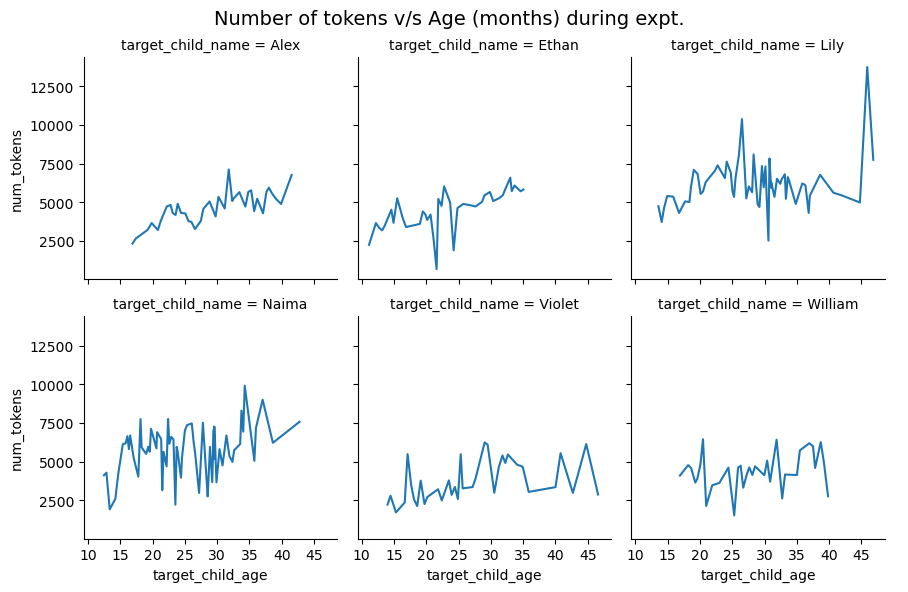

In [31]:
trainbychild = sns.FacetGrid(d_train, col ='target_child_name', height=3, col_wrap=3)
trainbychild.set(xticks = np.arange(10, 51, 5))
trainbychild.map(sns.lineplot, 'target_child_age', 'num_tokens').add_legend() 
trainbychild.fig.suptitle('Number of tokens v/s Age (months) during expt.', fontsize=14)
trainbychild.fig.subplots_adjust(top=0.9)  

Below graph uses smoothing by taking rolling averages with a window size of 7

/cm/shared/openmind8/anaconda/3-2023.09-0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


/cm/shared/openmind8/anaconda/3-2023.09-0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/cm/shared/openmind8/anaconda/3-2023.09-0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/cm/shared/openmind8/anaconda/3-2023.09-0/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/cm/shared/openmind8/anaconda/3-2023.09-0/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

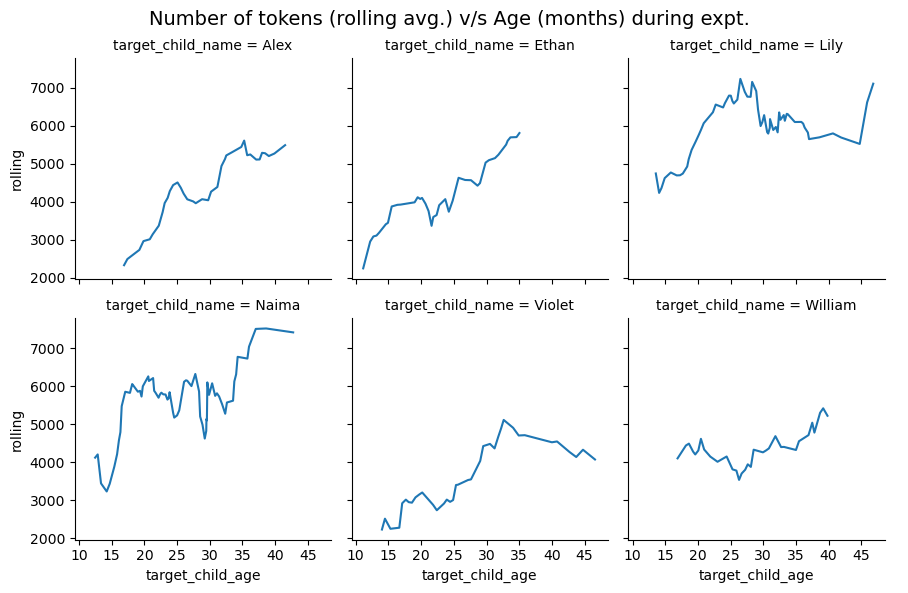

In [32]:
trainbychild = sns.FacetGrid(master_rolling, col ='target_child_name', height=3, col_wrap=3)
trainbychild.set(xticks = np.arange(10, 51, 5))
trainbychild.map(sns.lineplot, 'target_child_age', 'rolling').add_legend() 
trainbychild.fig.suptitle('Number of tokens (rolling avg.) v/s Age (months) during expt.', fontsize=14)
trainbychild.fig.subplots_adjust(top=0.9)  

/cm/shared/openmind8/anaconda/3-2023.09-0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/cm/shared/openmind8/anaconda/3-2023.09-0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/cm/shared/openmind8/anaconda/3-2023.09-0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/cm/shared/openmind8/anaconda/3-2023.09-0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

Text(0.5, 1.0, 'TRAIN DATA : tokens v/s age')

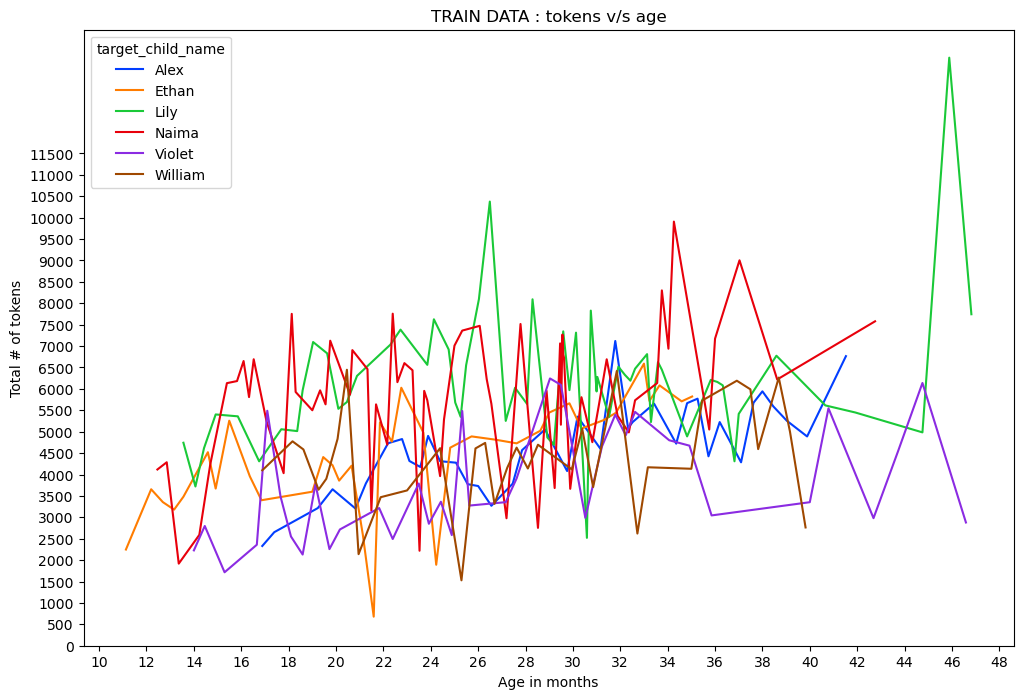

In [54]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='target_child_age', y=('num_tokens', 'sum'), hue='target_child_name', data=d_train,palette='bright')
plt.xticks(ticks=np.arange(10, 50, 2))  # Set the positions only
plt.yticks(ticks=np.arange(0, 12000, 500))  # Set the positions only
plt.xlabel('Age in months')
plt.ylabel('Total # of tokens')
plt.title('TRAIN DATA : tokens v/s age')
 


## Validate set

In [33]:
d_valid  = (full_valid.groupby(['target_child_name','target_child_age']).agg({'num_tokens':['sum']})).reset_index()

NameError: name 'full_valid' is not defined

/cm/shared/openmind8/anaconda/3-2023.09-0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/cm/shared/openmind8/anaconda/3-2023.09-0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/cm/shared/openmind8/anaconda/3-2023.09-0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/cm/shared/openmind8/anaconda/3-2023.09-0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

Text(0.5, 1.0, 'VALIDATION DATA : tokens v/s age')

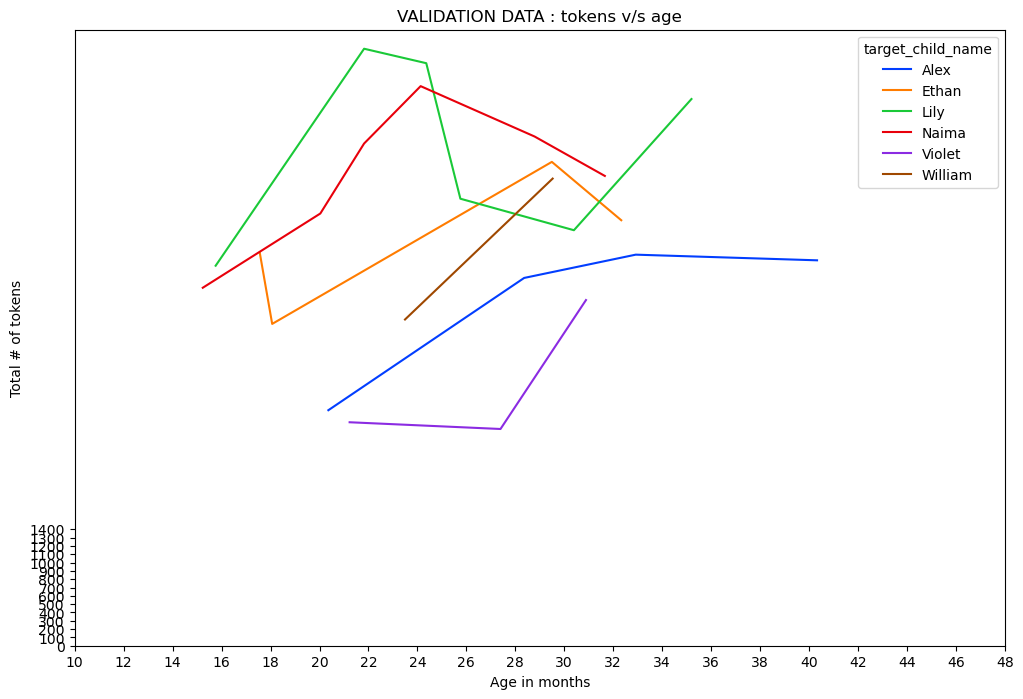

In [56]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='target_child_age', y=('num_tokens', 'sum'), hue='target_child_name', data=d_valid,palette='bright')
plt.xticks(ticks=np.arange(10, 50, 2))  # Set the positions only
plt.yticks(ticks=np.arange(0, 1500, 100))  # Set the positions only
plt.xlabel('Age in months')
plt.ylabel('Total # of tokens')
plt.title('VALIDATION DATA : tokens v/s age')

## Test set

In [34]:
d_test  = (full_test.groupby(['target_child_name','target_child_age']).agg({'num_tokens':['sum']})).reset_index()

/cm/shared/openmind8/anaconda/3-2023.09-0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/cm/shared/openmind8/anaconda/3-2023.09-0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/cm/shared/openmind8/anaconda/3-2023.09-0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/cm/shared/openmind8/anaconda/3-2023.09-0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

Text(0.5, 1.0, 'TEST DATA : tokens v/s age')

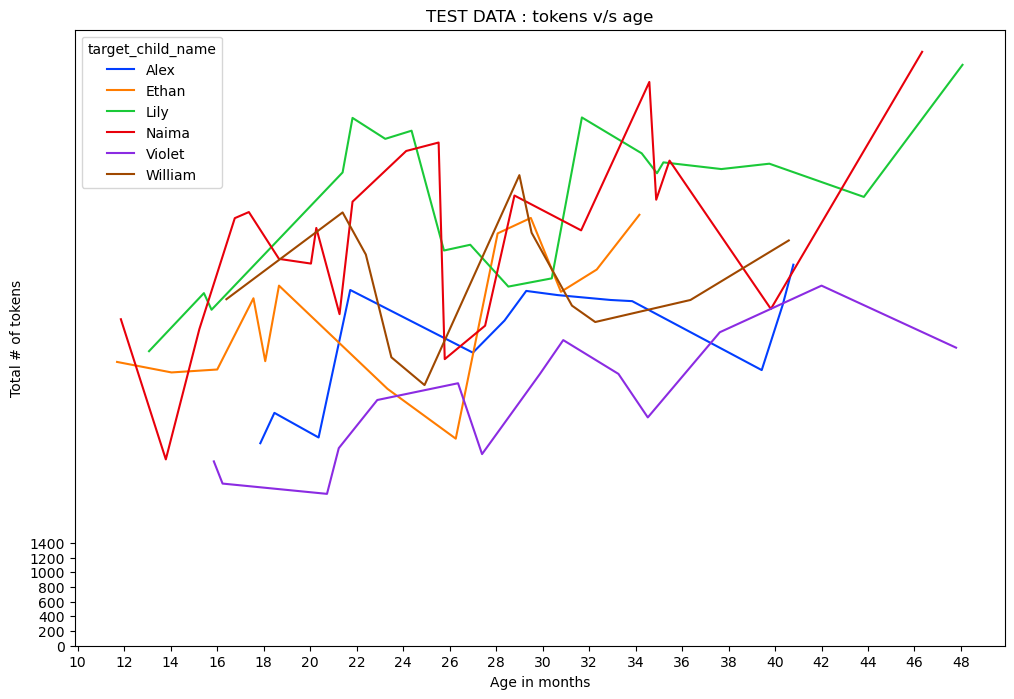

In [35]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='target_child_age', y=('num_tokens', 'sum'), hue='target_child_name', data=d_test,palette='bright')
plt.xticks(ticks=np.arange(10, 50, 2))  # Set the positions only
plt.yticks(ticks=np.arange(0, 1500, 200))  # Set the positions only
plt.xlabel('Age in months')
plt.ylabel('Total # of tokens')
plt.title('TEST DATA : tokens v/s age')

/cm/shared/openmind8/anaconda/3-2023.09-0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/cm/shared/openmind8/anaconda/3-2023.09-0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/cm/shared/openmind8/anaconda/3-2023.09-0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/cm/shared/openmind8/anaconda/3-2023.09-0/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

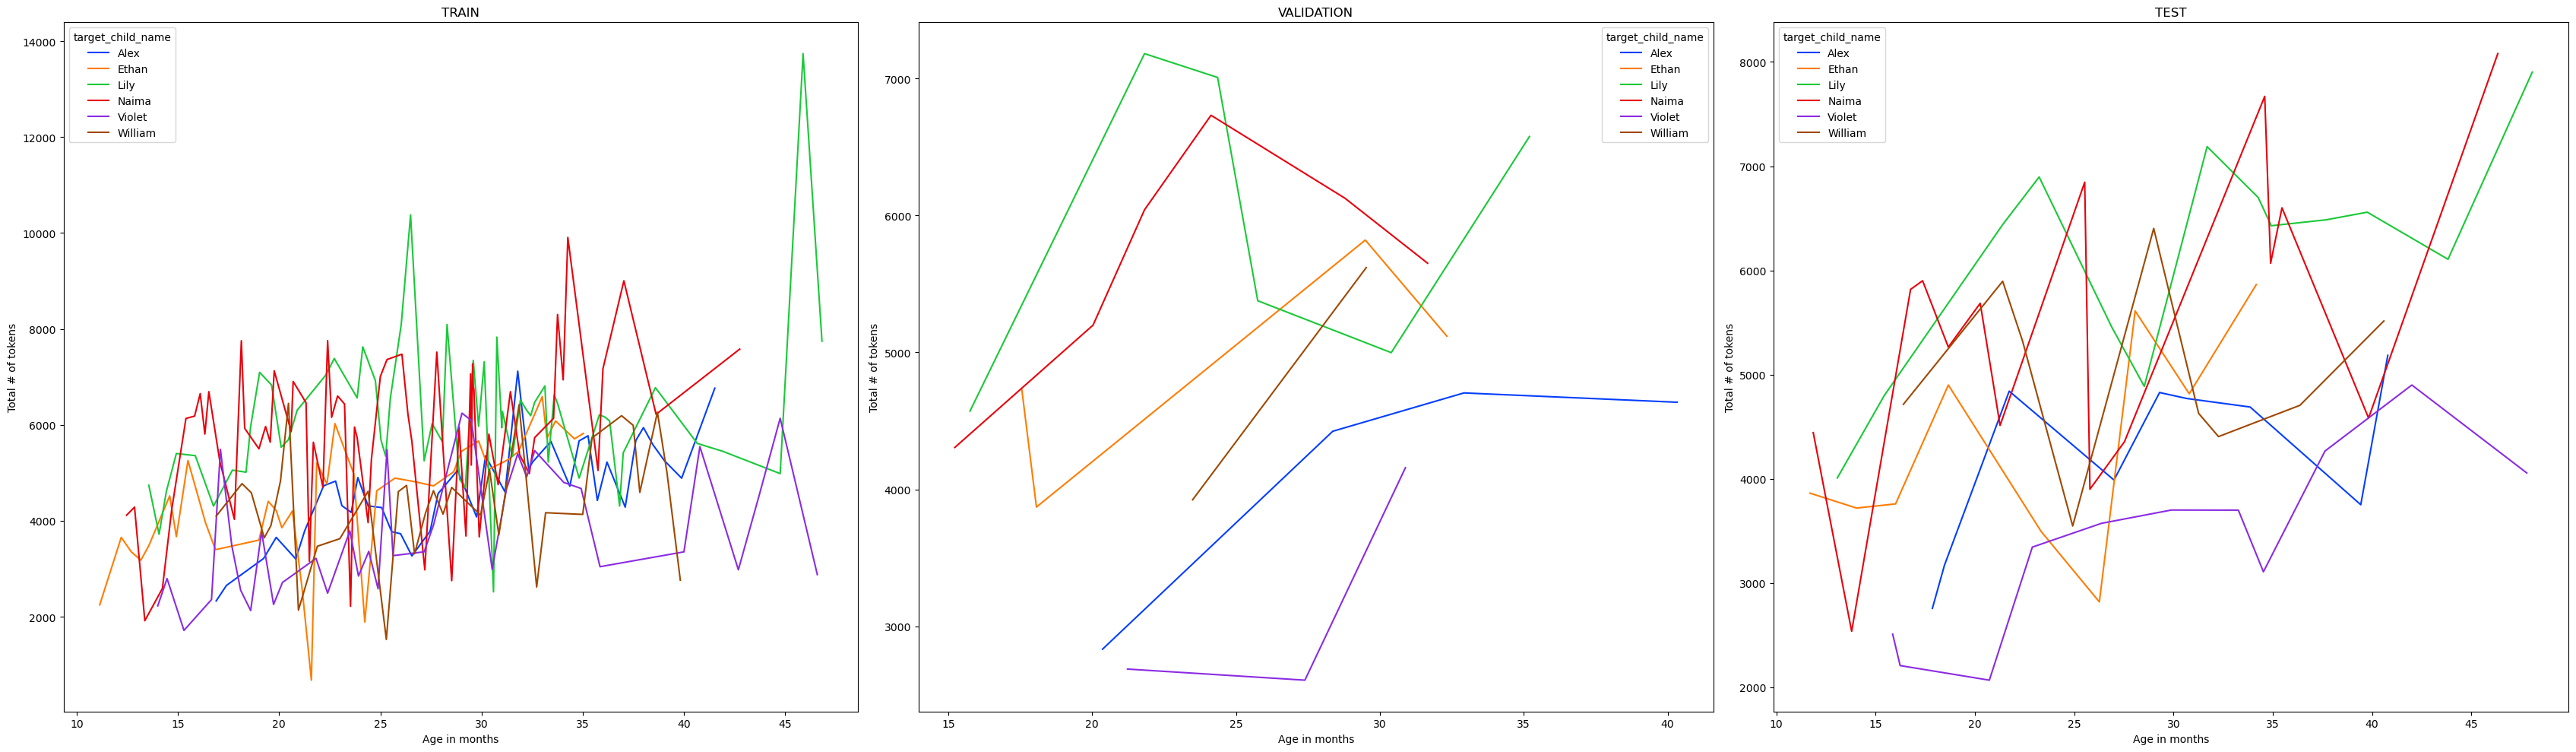

In [59]:
fig, axs = plt.subplots(1, 3, figsize=(34, 10))  # 1 row, 3 columns

# Plot 1
sns.lineplot(x='target_child_age', y=('num_tokens', 'sum'), hue='target_child_name', data=d_train,palette='bright', ax=axs[0])
axs[0].set_title('TRAIN')
axs[0].set_xlabel('Age in months')
axs[0].set_ylabel('Total # of tokens')

# Plot 2
sns.lineplot(x='target_child_age', y=('num_tokens', 'sum'), hue='target_child_name', data=d_valid,palette='bright', ax=axs[1])
axs[1].set_title('VALIDATION')
axs[1].set_xlabel('Age in months')
axs[1].set_ylabel('Total # of tokens')

# Plot 3
sns.lineplot(x='target_child_age', y=('num_tokens', 'sum'), hue='target_child_name', data=d_test,palette='bright', ax=axs[2])  
axs[2].set_title('TEST')
axs[2].set_xlabel('Age in months')
axs[2].set_ylabel('Total # of tokens')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

## Automating train, validate, test graphs for no. of tokens v/s age

/cm/shared/openmind8/anaconda/3-2023.09-0/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


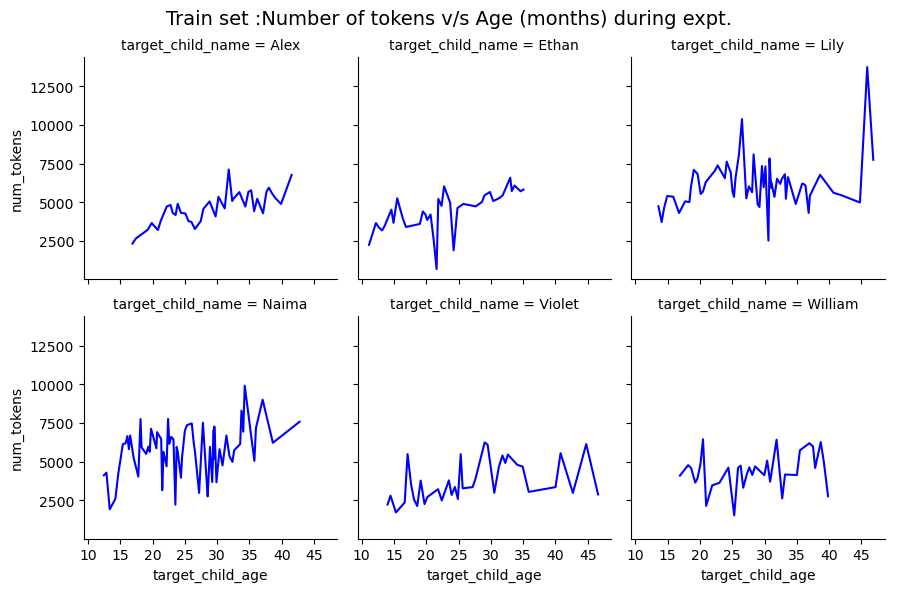

/cm/shared/openmind8/anaconda/3-2023.09-0/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


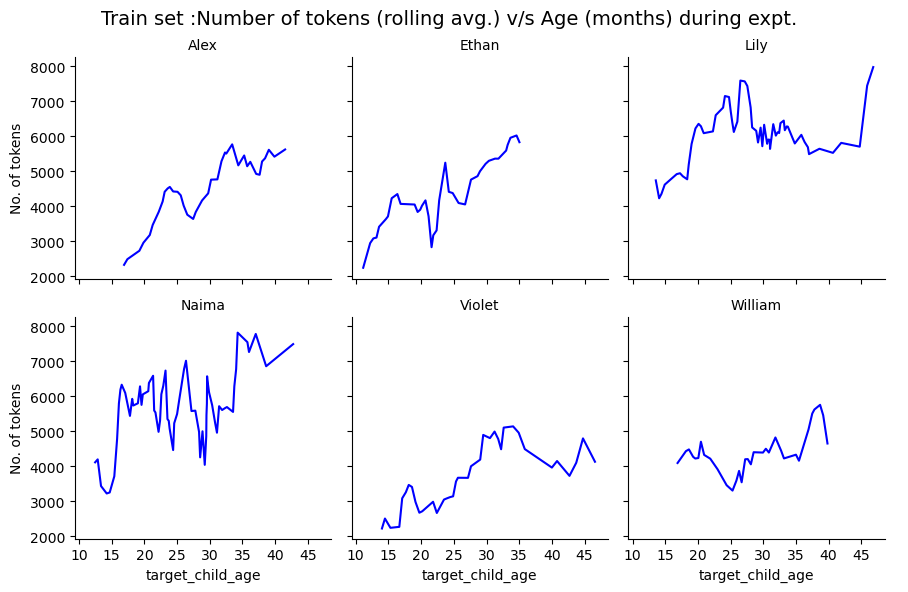

/cm/shared/openmind8/anaconda/3-2023.09-0/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


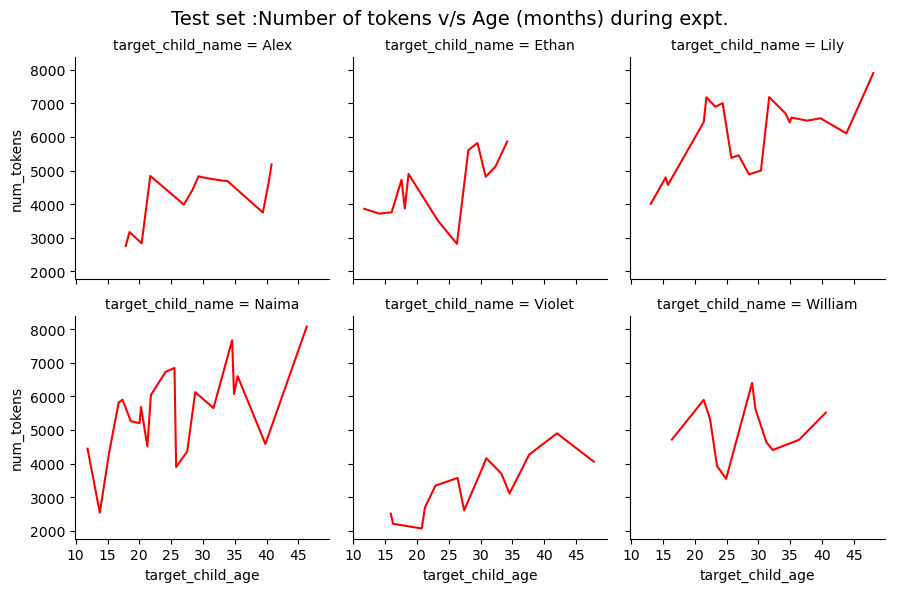

/cm/shared/openmind8/anaconda/3-2023.09-0/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


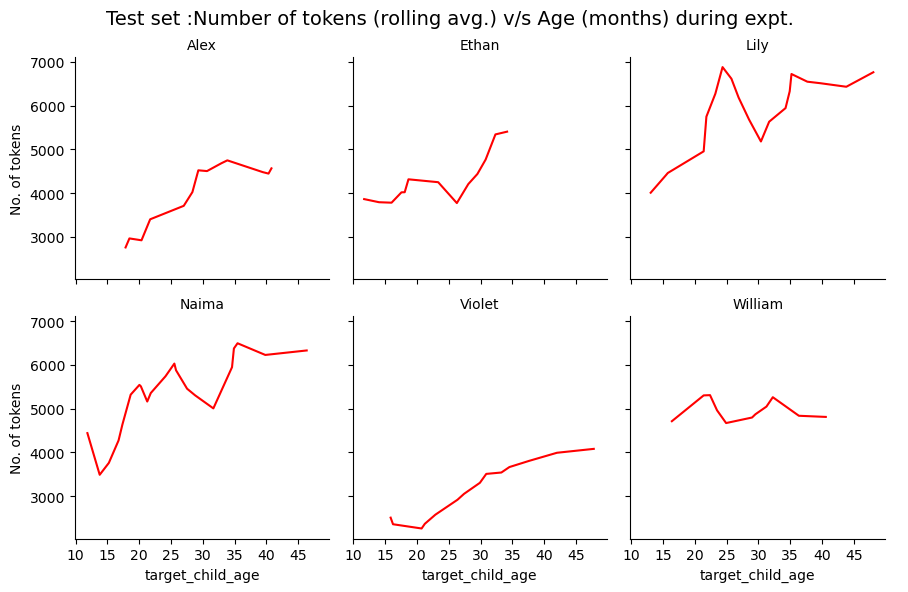

In [36]:
import warnings
from pandas.errors import SettingWithCopyWarning
#from pandas.errors import FutureWarning
warnings.filterwarnings('ignore', category=SettingWithCopyWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

labels = [0,2]
colors = ['blue','green','red']
for label in labels:
    if label == 0:
        dataset = full_train
        title = "Train set"
    elif label == 1:
        dataset = full_valid
        title = "Validation set"
    else:
        dataset = full_test
        title = "Test set"
    
    d_train  = (dataset.groupby(['target_child_name','target_child_age']).agg({'num_tokens':['sum']})).reset_index()


    rolling_list=[]
    for child in child_names:
        sub_df = d_train[d_train['target_child_name'] == child]
        sub_df['No. of tokens'] = sub_df['num_tokens']['sum'].rolling(window=4, min_periods=1).mean() 
        rolling_list.append(sub_df)
    
    master_rolling =  pd.concat([d for d in rolling_list]).reset_index()

    trainbychild = sns.FacetGrid(d_train, col ='target_child_name', height=3, col_wrap=3)
    trainbychild.set(xticks = np.arange(10, 51, 5))
    trainbychild.map(sns.lineplot, 'target_child_age', 'num_tokens',color=colors[label]).add_legend() 
    trainbychild.fig.suptitle(title+' :Number of tokens v/s Age (months) during expt.', fontsize=14)
    trainbychild.fig.subplots_adjust(top=0.9) 
    plt.show()
    print('\n')

    trainbychild = sns.FacetGrid(master_rolling, col ='target_child_name', height=3, col_wrap=3)
    trainbychild.set(xticks = np.arange(10, 51, 5))
    trainbychild.map(sns.lineplot, 'target_child_age', 'No. of tokens', color=colors[label]).add_legend() 
    trainbychild.fig.suptitle(title+' :Number of tokens (rolling avg.) v/s Age (months) during expt.', fontsize=14)
    trainbychild.fig.subplots_adjust(top=0.9)  
    trainbychild.set_titles(template = '{col_name}')
     
    plt.savefig(title+'_granular_plot.png')
    plt.show()


## Drawing KDE plots now

In [37]:
df_for_facet  = (dataset.groupby(['target_child_name','target_child_age']).agg({'num_tokens':['sum']})).reset_index()
unrolled_df = df_for_facet.loc[df_for_facet.index.repeat(df_for_facet['num_tokens']['sum'])].reset_index(drop=True)

In [ ]:
unrolled_df

,target_child_name,target_child_age,num_tokens
,,,sum
0,Alex,17.854576,2755
1,Alex,17.854576,2755
2,Alex,17.854576,2755
3,Alex,17.854576,2755
4,Alex,17.854576,2755
...,...,...,...
446332,William,40.592209,5514
446333,William,40.592209,5514
446334,William,40.592209,5514


/cm/shared/openmind8/anaconda/3-2023.09-0/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


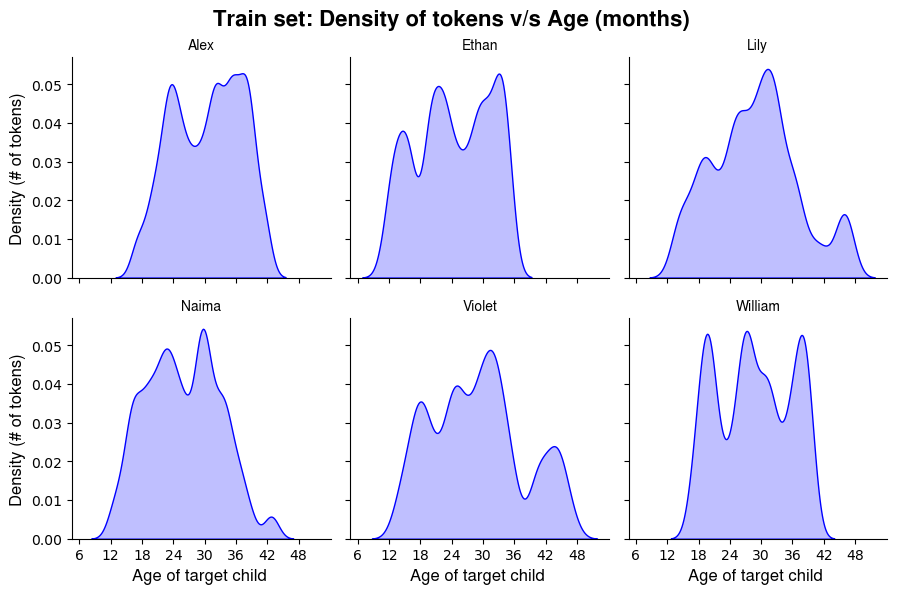

/cm/shared/openmind8/anaconda/3-2023.09-0/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


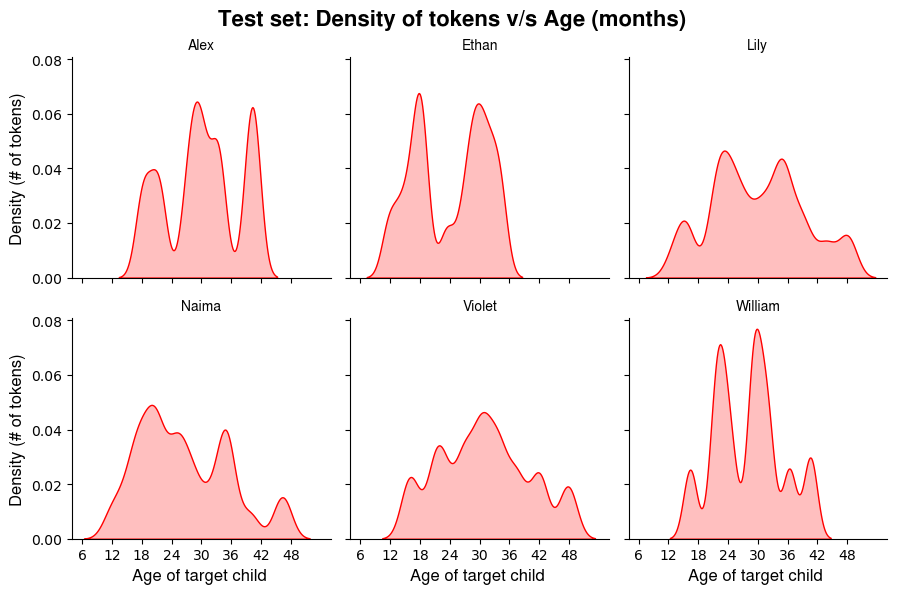

In [39]:
import warnings
from pandas.errors import SettingWithCopyWarning
#from pandas.errors import FutureWarning
warnings.filterwarnings('ignore', category=SettingWithCopyWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

labels = [0,2]
colors = ['blue','green','red']
for label in labels:
    if label == 0:
        dataset = full_train
        title = "Train set"
    elif label == 1:
        dataset = full_valid
        title = "VALIDATION SET"
    else:
        dataset = full_test
        title = "Test set"
    
    df_for_facet  = (dataset.groupby(['target_child_name','target_child_age']).agg({'num_tokens':['sum']})).reset_index()
    unrolled_df = df_for_facet.loc[df_for_facet.index.repeat(df_for_facet['num_tokens']['sum'])].reset_index(drop=True)
    
    '''
    rolling_list=[]
    
    for child in child_names:
        sub_df = df_for_facet[df_for_facet['target_child_name'] == child]
        sub_df['No. of tokens'] = sub_df['num_tokens']['sum'].rolling(window=4, min_periods=1).mean() 
        rolling_list.append(sub_df)
    '''

    trainbychild = sns.FacetGrid(unrolled_df, col ='target_child_name', height=3, col_wrap=3)
    trainbychild.set(xticks = np.arange(6, 51, 6))
    trainbychild.map(sns.kdeplot, 'target_child_age',  fill=True,bw_method=0.2,color=colors[label]).add_legend() 
    trainbychild.fig.suptitle(title+': Density of tokens v/s Age (months)', **hfont,fontsize=16,weight='bold')

    trainbychild.set_ylabels('Density (# of tokens)', fontdict={'fontfamily': 'Nimbus Sans','fontsize':12})
    trainbychild.set_xlabels('Age of target child ', fontdict={'fontfamily': 'Nimbus Sans','fontsize':12})
    plt.ylabel('Residual (= True value - Model value)', **hfont)
    trainbychild.fig.subplots_adjust(top=0.9) 
    trainbychild.set_titles(template = '{col_name}', fontdict={'fontfamily': 'Nimbus Sans', 'fontsize':14})
 
    print('\n')
     
    plt.savefig(title+'_kde_plot.pdf')
    plt.show()



## CHILD-WISE ANALYSIS

In [64]:
agg_func  = {'num_tokens':['sum']}
bar_master = (full_merge_with_split.groupby(['target_child_name','speaker_role','split']).agg(agg_func)).reset_index()

In [43]:
!hostname

node091


In [66]:
bar_master_alex = bar_master[bar_master['target_child_name']=='Alex']

In [67]:
alex_sums = bar_master_alex.groupby('speaker_role')['num_tokens'].sum().reset_index()
alex_merged = pd.merge(bar_master_alex, alex_sums, on='speaker_role')

/tmp/ipykernel_3605748/4273109649.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  alex_merged = pd.merge(bar_master_alex, alex_sums, on='speaker_role')


In [68]:
bar_master_alex['proportion'] = alex_merged['num_tokens_x'] / alex_merged['num_tokens_y']

In [69]:
bar_master_alex

,target_child_name,speaker_role,split,num_tokens,proportion
,,,,sum,
0,Alex,Adult,TE,36,0.030405
1,Alex,Adult,TR,1148,0.969595
2,Alex,Environment,TE,38,0.030919
3,Alex,Environment,TR,655,0.532954
4,Alex,Environment,VA,536,0.436127
5,Alex,Father,TE,36,0.031915
6,Alex,Father,TR,1068,0.946809
7,Alex,Father,VA,24,0.021277
8,Alex,Grandfather,TR,1078,1.000000


Text(0.5, 1.0, 'ALEX (capped at 20k tokens for visibility)')

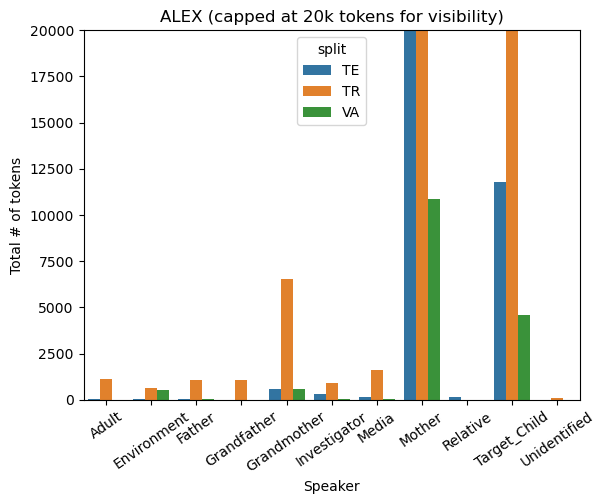

In [70]:
sns.barplot(x='speaker_role', y=('num_tokens','sum'), hue='split', data=bar_master_alex)
plt.ylim(0, 20000)
plt.xticks(rotation=35) 
plt.xlabel('Speaker')
plt.ylabel('Total # of tokens')
plt.title('ALEX (capped at 20k tokens for visibility)')

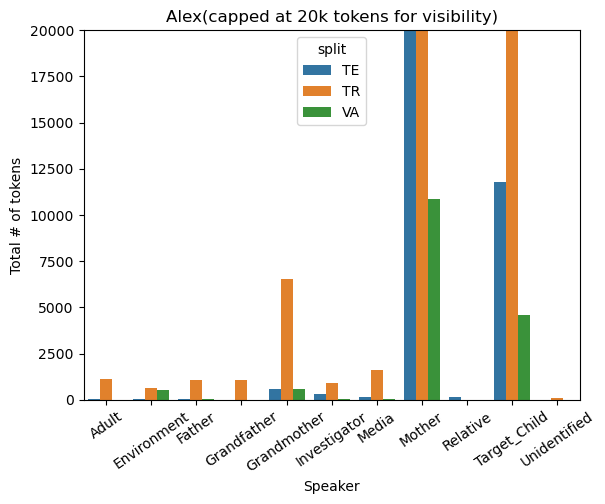

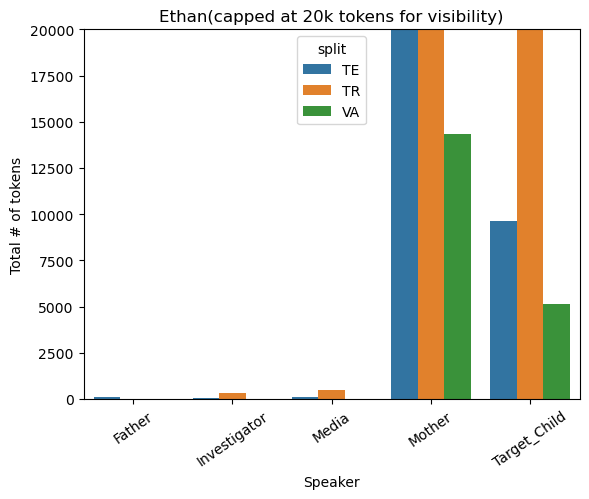

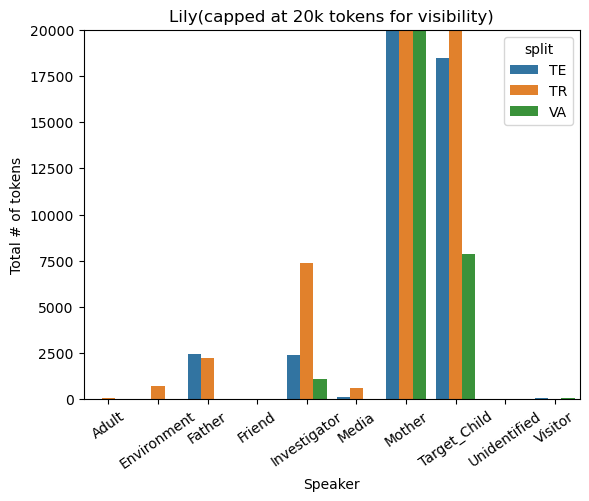

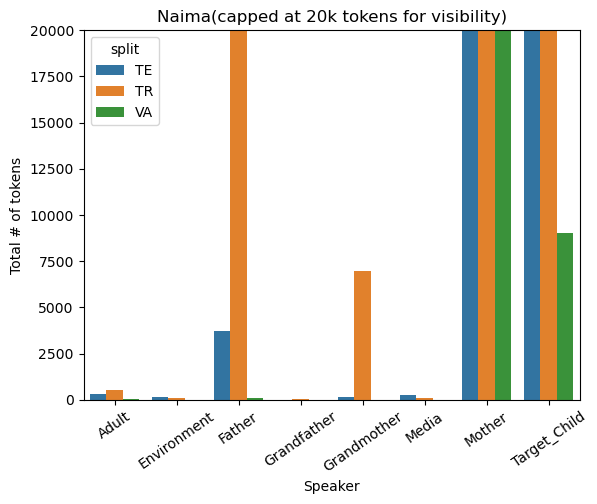

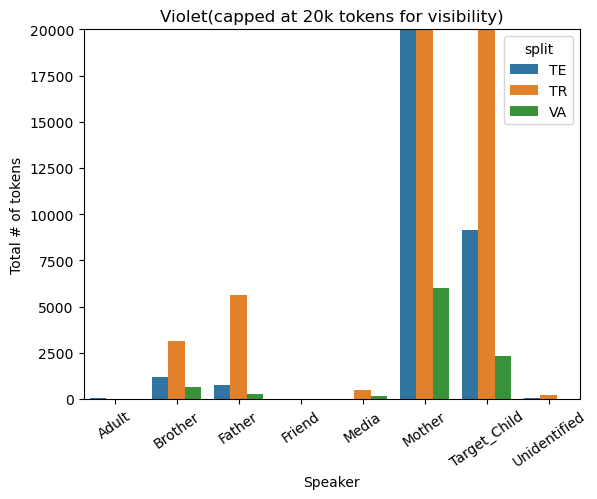

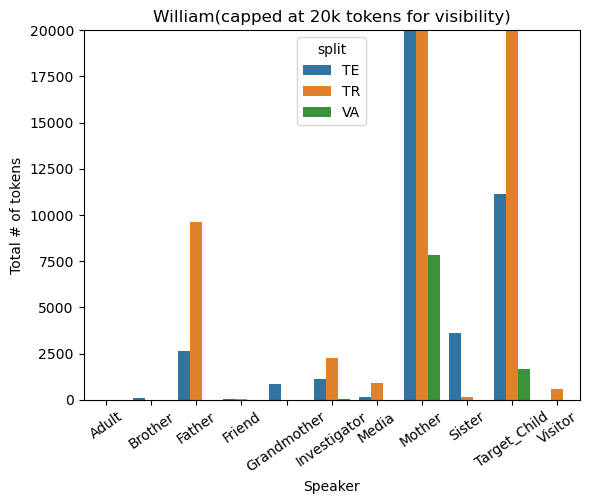

In [71]:
def create_child_graph(name):
    bar_master_alex = bar_master[bar_master['target_child_name']==name]
    sns.barplot(x='speaker_role', y=('num_tokens','sum'), hue='split', data=bar_master_alex)
    plt.ylim(0, 20000)
    plt.xticks(rotation=35) 
    plt.xlabel('Speaker')
    plt.ylabel('Total # of tokens')
    plt.title(name + '(capped at 20k tokens for visibility)')
    plt.show()

for child in child_names:
    create_child_graph(child)

## Child-wise analysis (only considering child and mother/father)

In [44]:
child_wise_master = (full_merge_with_split.groupby(['target_child_name','speaker_code','split']).agg(agg_func)).reset_index()
child_wise_master

,target_child_name,speaker_code,split,num_tokens
,,,,sum
0,Alex,AD1,TR,29
1,Alex,AD2,TR,309
2,Alex,ADU,TE,36
3,Alex,ADU,TR,810
4,Alex,CHI,TE,16386
...,...,...,...,...
116,William,SIS,TR,157
117,William,TOY,TE,166
118,William,TOY,TR,745


In [45]:
relevant_codes = ['CHI','MOT']

In [46]:
df_fmc = child_wise_master[child_wise_master['speaker_code'].isin(relevant_codes)]

/cm/shared/openmind8/anaconda/3-2023.09-0/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


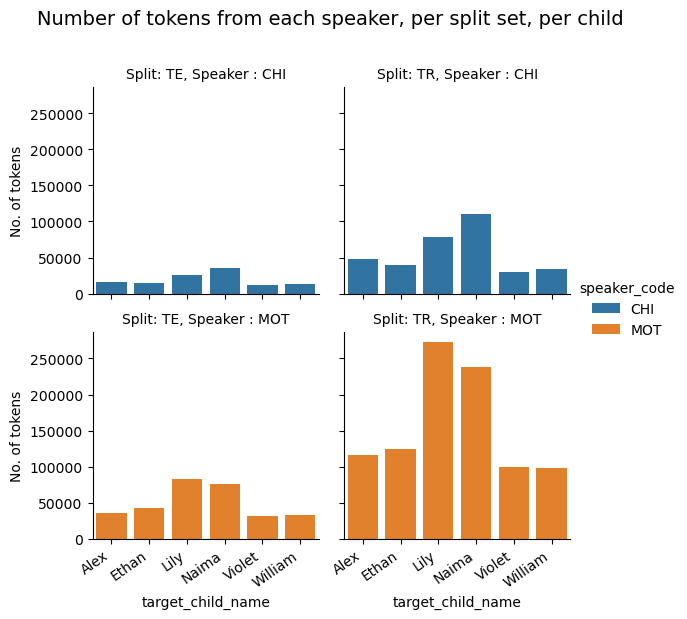

In [48]:
warnings.filterwarnings('ignore', category=SettingWithCopyWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
graph_speaker = sns.FacetGrid(df_fmc, col ='split', height=3, row='speaker_code',hue='speaker_code')
#trainbychild.set(xticks = np.arange(10, 51, 5))
graph_speaker.map(sns.barplot, 'target_child_name', 'num_tokens',order=child_names,errorbar=None).add_legend() 
graph_speaker.fig.suptitle('Number of tokens from each speaker, per split set, per child', fontsize=14)
graph_speaker.fig.subplots_adjust(top=0.851) 
for ax in graph_speaker.axes.flatten():
    ax.set_xticklabels(child_names, rotation=35, ha='right')
graph_speaker.set_ylabels(label = 'No. of tokens')
graph_speaker.set_titles(template = 'Split: {col_name}, Speaker : {row_name}')
plt.savefig('tokens_by_child_speakercodes.pdf', bbox_inches='tight')
plt.show()

In [78]:
trans_ages[trans_ages['target_child_name']=='William']

,transcript_id,target_child_age,target_child_name,bin_label
403689,43530,16.887410,William,12-18
404906,43535,19.591778,William,18-24
405380,43538,20.953202,William,18-24
406109,43542,22.394710,William,18-24
406306,43541,23.000472,William,18-24
406312,43540,21.887513,William,18-24
406377,43533,18.624612,William,18-24
406512,43543,23.493296,William,18-24
406531,43531,16.394587,William,12-18
409120,43547,25.887595,William,24-30


In [48]:
trans_labelled[(trans_labelled['target_child_name']=='William') & (trans_labelled['bin_label']=='18-24')]

,index,transcript_id,target_child_age,target_child_name,bin_label,split
130,404906,43535,19.591778,William,18-24,TR
131,405380,43538,20.953202,William,18-24,TR
132,406109,43542,22.394710,William,18-24,TE
133,406306,43541,23.000472,William,18-24,TR
134,406312,43540,21.887513,William,18-24,TR
135,406377,43533,18.624612,William,18-24,TR
136,406512,43543,23.493296,William,18-24,TE
137,409210,43532,18.164644,William,18-24,TR
138,409211,43537,20.460379,William,18-24,TR
139,409212,43539,21.394690,William,18-24,TE
